In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

from scipy import stats
import collections

import warnings
# warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

from pathlib import Path

import db_queries as db
import vivarium_helpers.id_helper as idh
import gbd_mapping
from vivarium import Artifact

# Add the repo directory vivarium_research_ciff_sam/ to sys.path
import os, sys
repo_path = os.path.abspath('../..')
sys.path.append(repo_path)
# Assumes vivarium_research_ciff_sam/ is in sys.path
# import model_validation.vivarium_transformed_output as vto
# import model_validation.vivarium_raw_output as vro
import model_validation.vivarium_output_processing as vp
import model_validation.ciff_sam_results as csr
import model_validation.ciff_sam_plots as csp

%load_ext autoreload
%autoreload 2

!pwd
!whoami
!date

/ihme/homes/ndbs/vivarium_research_ciff_sam/model_validation/model4
ndbs
Wed Nov 24 17:27:13 PST 2021


# Goal: Verify wasting transition rate ratios for X-factor vs. no X-factor in v4.5.5 (linear scale-up, etc.)

# Load results and set global index columns

In [3]:
csr.get_count_data_path('4.5.5', '2021_11_22_09_07_22')

'/ihme/costeffectiveness/results/vivarium_ciff_sam/v4.5.5_linear_scale-up_etc/ciff_sam/2021_11_22_09_07_22/count_data/'

In [5]:
results = csr.VivariumResults.cleaned_from_model_spec('4.5.5', '2021_11_22_09_07_22')
results.table_names()

['wasting_transition_count',
 'wasting_state_person_time',
 'deaths',
 'stunting_state_person_time',
 'population',
 'ylls',
 'ylds',
 'person_time',
 'cause_state_person_time',
 'cause_transition_count']

In [6]:
# No x_factor_effect column in these results since we only used one value
results.wasting_state_person_time

,sex,year,wasting_state,measure,input_draw,scenario,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,covered,uncovered,covered,early_neonatal
...,...,...,...,...,...,...,...,...,...,...,...,...
92156,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,2511.623546,cat2,uncovered,covered,uncovered,2_to_4
92157,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,2323.058179,cat1,uncovered,covered,uncovered,2_to_4
92158,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,1075.831622,cat2,uncovered,uncovered,uncovered,2_to_4
92159,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,995.794661,cat1,uncovered,uncovered,uncovered,2_to_4


In [7]:
# No x_factor_effect column in these results since we only used one value
# vp.set_global_index_columns(vp.INDEX_COLUMNS+['x_factor_effect'])
vp.INDEX_COLUMNS

['input_draw', 'scenario']

# Compute X-factor rate ratios stratified by year and age

In [8]:
wasting_rate_ratio_by_year_age = csr.get_x_factor_wasting_transition_rate_ratio(results, ['year', 'age'])
wasting_rate_ratio_by_year_age

,year,age,transition,from_state,to_state,input_draw,scenario,numerator_x_factor,denominator_x_factor,value,numerator_measure,denominator_measure,multiplier,measure
0,2022,12_to_23_months,mild_child_wasting_to_moderate_acute_malnutrition,mild_child_wasting,moderate_acute_malnutrition,29,baseline,cat1,cat2,3.195787,transition_rate,transition_rate,1,rate_ratio
1,2022,12_to_23_months,mild_child_wasting_to_moderate_acute_malnutrition,mild_child_wasting,moderate_acute_malnutrition,29,wasting_treatment,cat1,cat2,3.195787,transition_rate,transition_rate,1,rate_ratio
2,2022,12_to_23_months,mild_child_wasting_to_moderate_acute_malnutrition,mild_child_wasting,moderate_acute_malnutrition,223,baseline,cat1,cat2,3.204562,transition_rate,transition_rate,1,rate_ratio
3,2022,12_to_23_months,mild_child_wasting_to_moderate_acute_malnutrition,mild_child_wasting,moderate_acute_malnutrition,223,wasting_treatment,cat1,cat2,3.204562,transition_rate,transition_rate,1,rate_ratio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2026,6-11_months,susceptible_to_child_wasting_to_mild_child_was...,susceptible_to_child_wasting,mild_child_wasting,829,baseline,cat1,cat2,0.975981,transition_rate,transition_rate,1,rate_ratio
2517,2026,6-11_months,susceptible_to_child_wasting_to_mild_child_was...,susceptible_to_child_wasting,mild_child_wasting,829,wasting_treatment,cat1,cat2,0.974496,transition_rate,transition_rate,1,rate_ratio
2518,2026,6-11_months,susceptible_to_child_wasting_to_mild_child_was...,susceptible_to_child_wasting,mild_child_wasting,946,baseline,cat1,cat2,0.966704,transition_rate,transition_rate,1,rate_ratio
2519,2026,6-11_months,susceptible_to_child_wasting_to_mild_child_was...,susceptible_to_child_wasting,mild_child_wasting,946,wasting_treatment,cat1,cat2,0.968638,transition_rate,transition_rate,1,rate_ratio


In [9]:
wasting_rate_ratio_by_year_age.transition.unique()

array(['mild_child_wasting_to_moderate_acute_malnutrition',
       'mild_child_wasting_to_susceptible_to_child_wasting',
       'moderate_acute_malnutrition_to_mild_child_wasting',
       'moderate_acute_malnutrition_to_severe_acute_malnutrition',
       'severe_acute_malnutrition_to_mild_child_wasting',
       'severe_acute_malnutrition_to_moderate_acute_malnutrition',
       'susceptible_to_child_wasting_to_mild_child_wasting'], dtype=object)

In [10]:
wasting_incidence_transitions = (
    'susceptible_to_child_wasting_to_mild_child_wasting',
    'mild_child_wasting_to_moderate_acute_malnutrition',
    'moderate_acute_malnutrition_to_severe_acute_malnutrition',
)

# Plot mild wasting incidence rate ratio over time for each value of X-factor effect

Looks close to 1 as it should, but maybe a bit low.

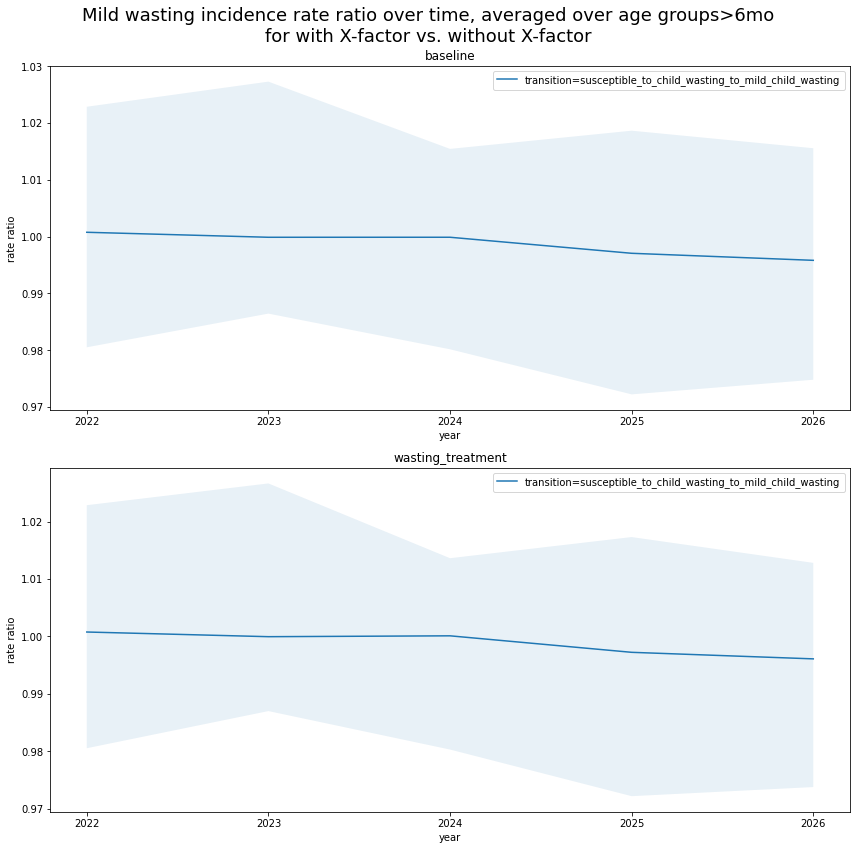

In [15]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year_age.query("transition=='susceptible_to_child_wasting_to_mild_child_wasting'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time, averaged over age groups>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

# Oops, since I stratified by age, it makes more sense to look at each age group separately

Mild wasting incidence rate ratios by age group all look close to 1 as expected, but there is some slight variation with time, depending on age group.

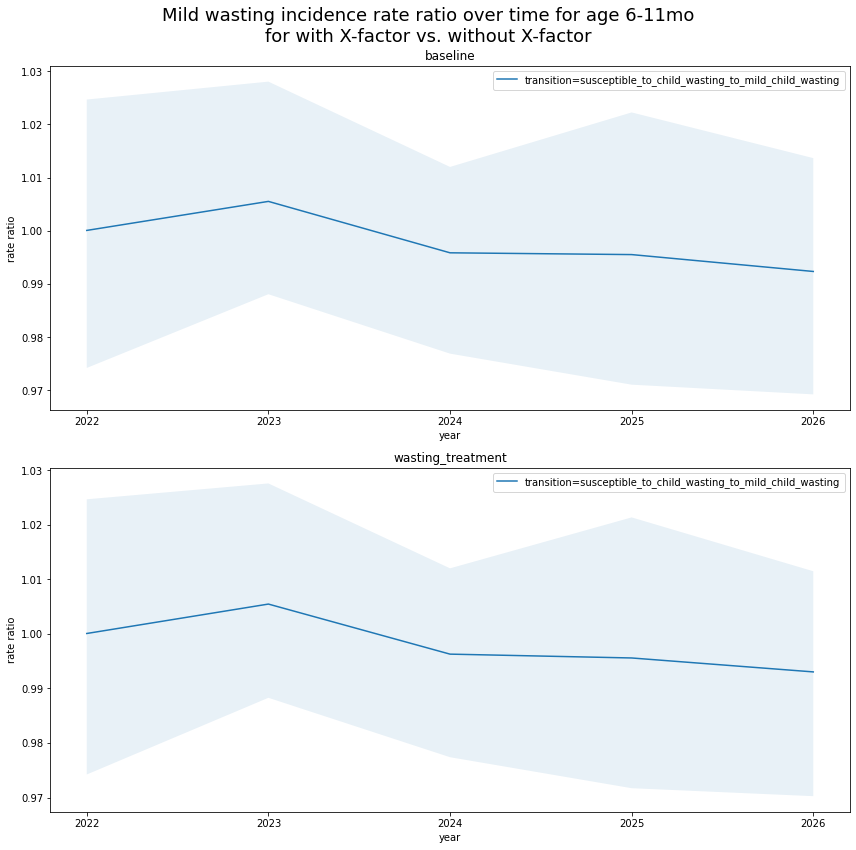

In [16]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year_age.query(
        "transition=='susceptible_to_child_wasting_to_mild_child_wasting' and age=='6-11_months'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time for age 6-11mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

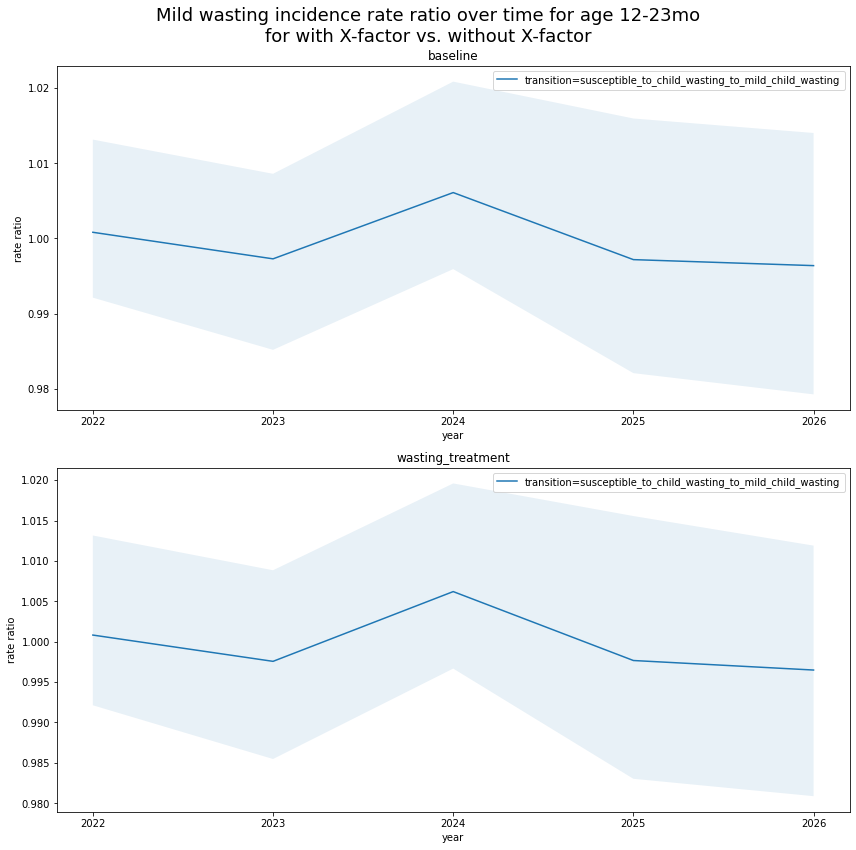

In [17]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year_age.query(
        "transition=='susceptible_to_child_wasting_to_mild_child_wasting' and age=='12_to_23_months'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time for age 12-23mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

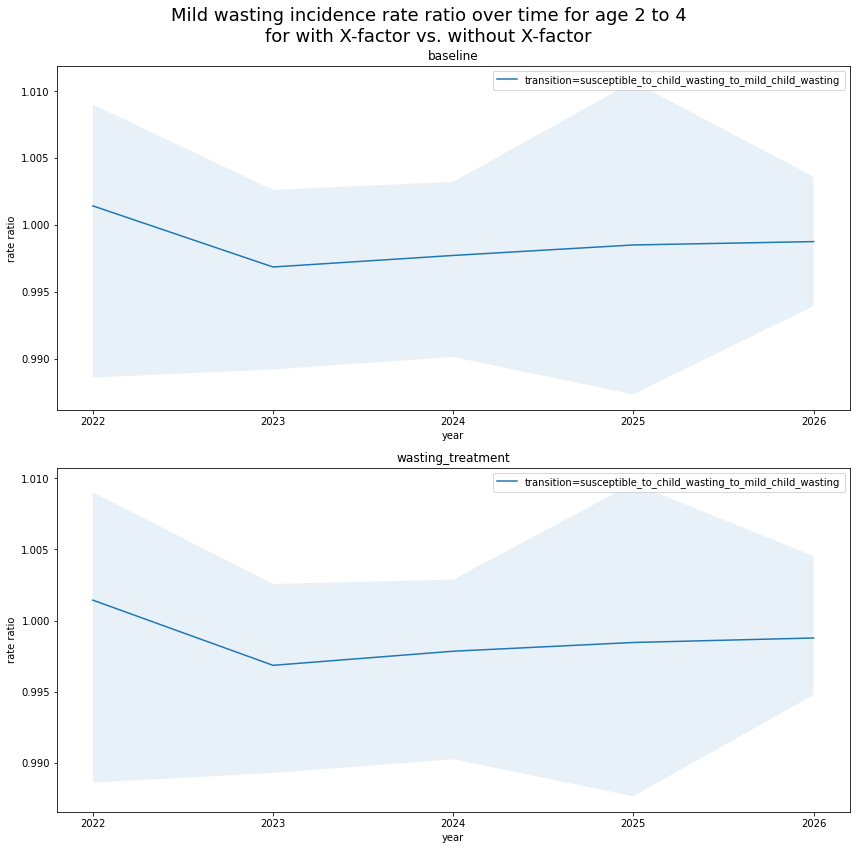

In [18]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year_age.query(
        "transition=='susceptible_to_child_wasting_to_mild_child_wasting' and age=='2_to_4'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time for age 2 to 4"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

# Now compute X-factor rate ratios stratified by year only

In [19]:
wasting_rate_ratio_by_year = csr.get_x_factor_wasting_transition_rate_ratio(results, ['year'])
wasting_rate_ratio_by_year

,year,transition,from_state,to_state,input_draw,scenario,numerator_x_factor,denominator_x_factor,value,numerator_measure,denominator_measure,multiplier,measure
0,2022,mild_child_wasting_to_moderate_acute_malnutrition,mild_child_wasting,moderate_acute_malnutrition,29,baseline,cat1,cat2,3.189768,transition_rate,transition_rate,1,rate_ratio
1,2022,mild_child_wasting_to_moderate_acute_malnutrition,mild_child_wasting,moderate_acute_malnutrition,29,wasting_treatment,cat1,cat2,3.189768,transition_rate,transition_rate,1,rate_ratio
2,2022,mild_child_wasting_to_moderate_acute_malnutrition,mild_child_wasting,moderate_acute_malnutrition,223,baseline,cat1,cat2,3.198123,transition_rate,transition_rate,1,rate_ratio
3,2022,mild_child_wasting_to_moderate_acute_malnutrition,mild_child_wasting,moderate_acute_malnutrition,223,wasting_treatment,cat1,cat2,3.198123,transition_rate,transition_rate,1,rate_ratio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2026,susceptible_to_child_wasting_to_mild_child_was...,susceptible_to_child_wasting,mild_child_wasting,829,baseline,cat1,cat2,0.995299,transition_rate,transition_rate,1,rate_ratio
837,2026,susceptible_to_child_wasting_to_mild_child_was...,susceptible_to_child_wasting,mild_child_wasting,829,wasting_treatment,cat1,cat2,0.996503,transition_rate,transition_rate,1,rate_ratio
838,2026,susceptible_to_child_wasting_to_mild_child_was...,susceptible_to_child_wasting,mild_child_wasting,946,baseline,cat1,cat2,0.995787,transition_rate,transition_rate,1,rate_ratio
839,2026,susceptible_to_child_wasting_to_mild_child_was...,susceptible_to_child_wasting,mild_child_wasting,946,wasting_treatment,cat1,cat2,0.995827,transition_rate,transition_rate,1,rate_ratio


# Plot incidence rate ratio over time for each wasting category

- Mild incidence rate ratio looks slightly too low, i.e. smaller than 1
- Moderate incidence rate ratio is close to 3.16 as expected
- Severe incidence ratio looks too high, more like 3.2 or 3.25 instead of 3.16, with some slight variation over time

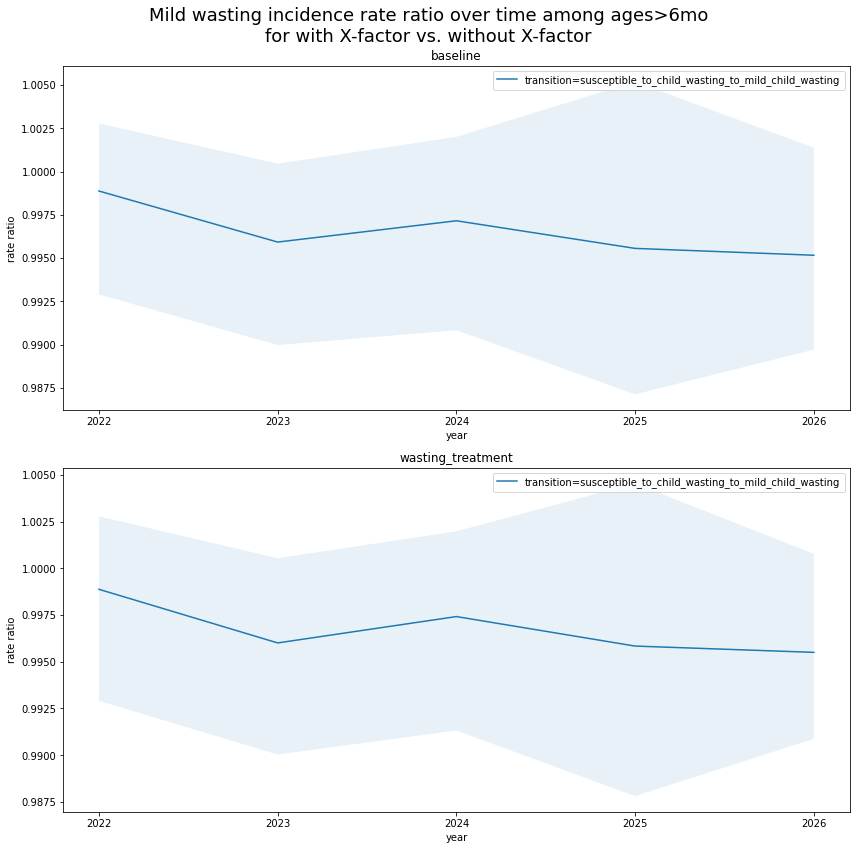

In [20]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='susceptible_to_child_wasting_to_mild_child_wasting'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

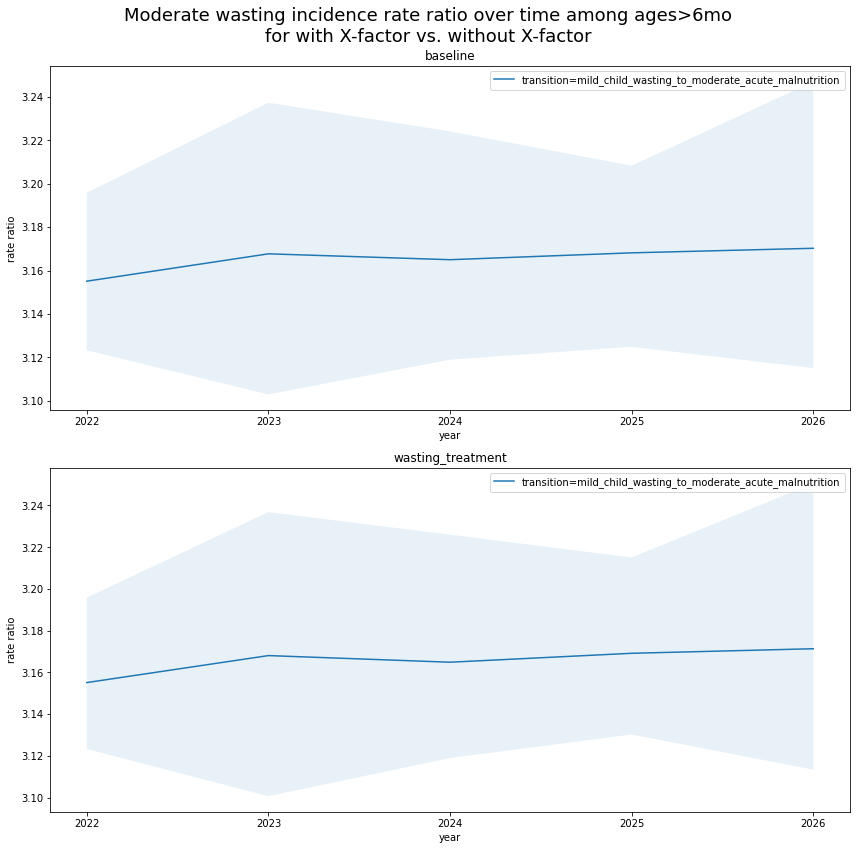

In [21]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='mild_child_wasting_to_moderate_acute_malnutrition'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Moderate wasting incidence rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

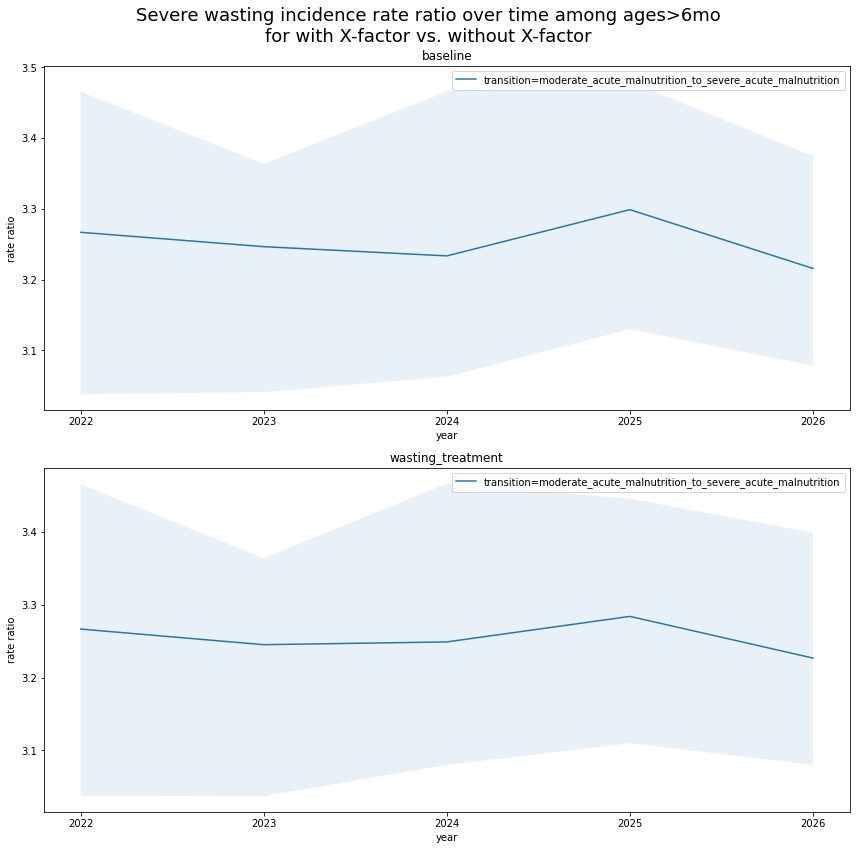

In [22]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='moderate_acute_malnutrition_to_severe_acute_malnutrition'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Severe wasting incidence rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

# Try ploting all of the above incidence rate ratios in one plot

In [29]:
wasting_incidence_transitions

('susceptible_to_child_wasting_to_mild_child_wasting',
 'mild_child_wasting_to_moderate_acute_malnutrition',
 'moderate_acute_malnutrition_to_severe_acute_malnutrition')

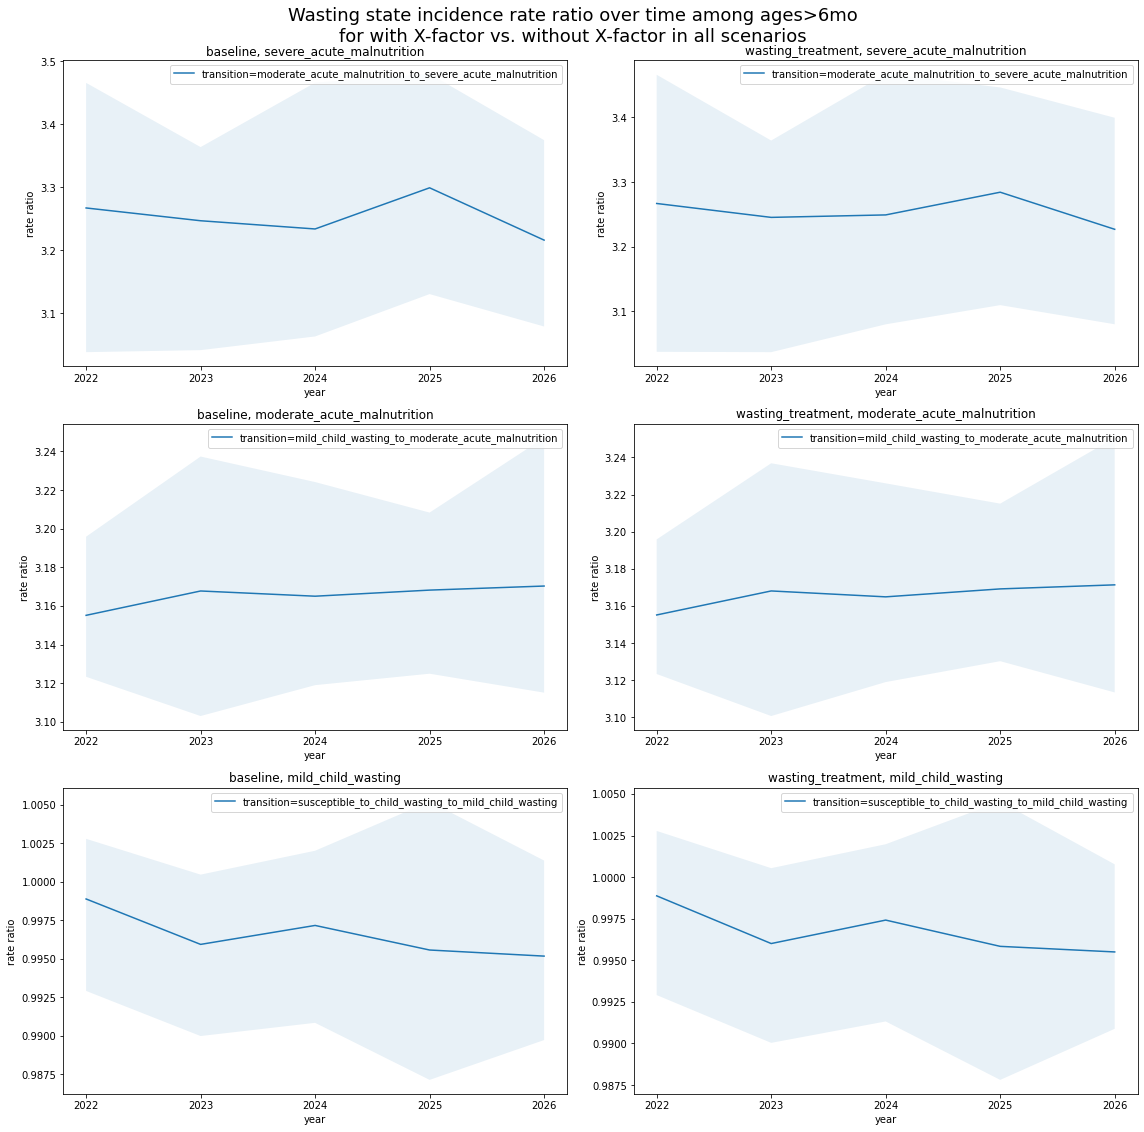

In [31]:
fig = csp.plot_over_time_by_column_for_each_wasting_state_and_scenario(
    (wasting_rate_ratio_by_year
     .query("transition in @wasting_incidence_transitions")
     .rename(columns={'to_state':'wasting_state'})
    ),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Wasting state incidence rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor in all scenarios",
    uncertainty=True,
)

# Now plot remission rate ratios over time to make sure they're always 1

Looks good, back on par with v4.5.2.

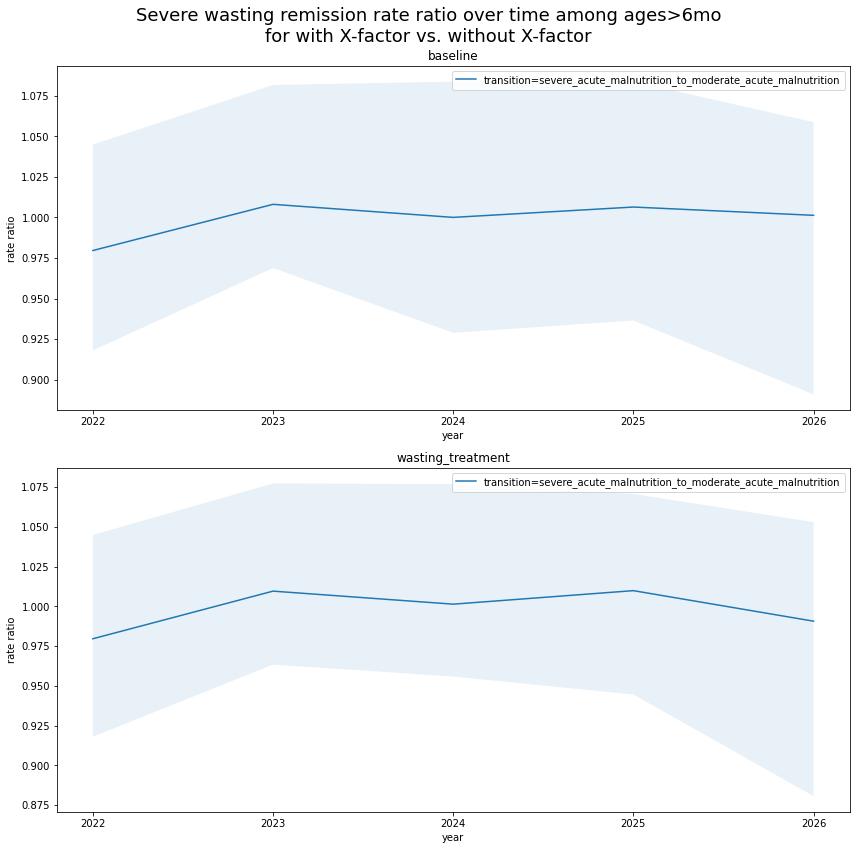

In [23]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='severe_acute_malnutrition_to_moderate_acute_malnutrition'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Severe wasting remission rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

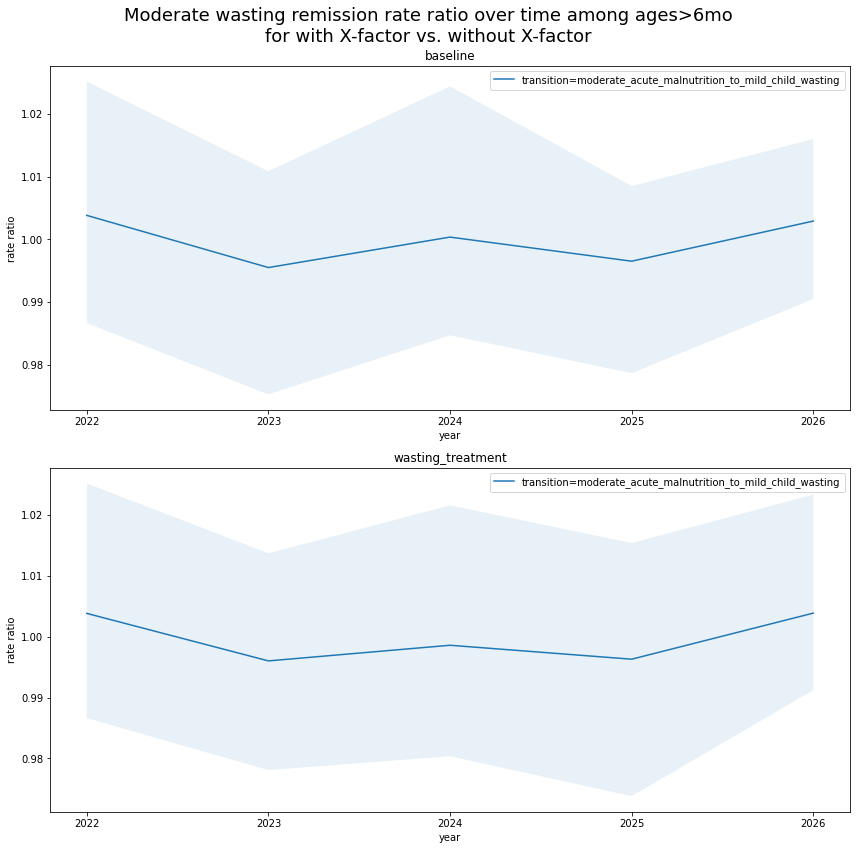

In [24]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='moderate_acute_malnutrition_to_mild_child_wasting'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Moderate wasting remission rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

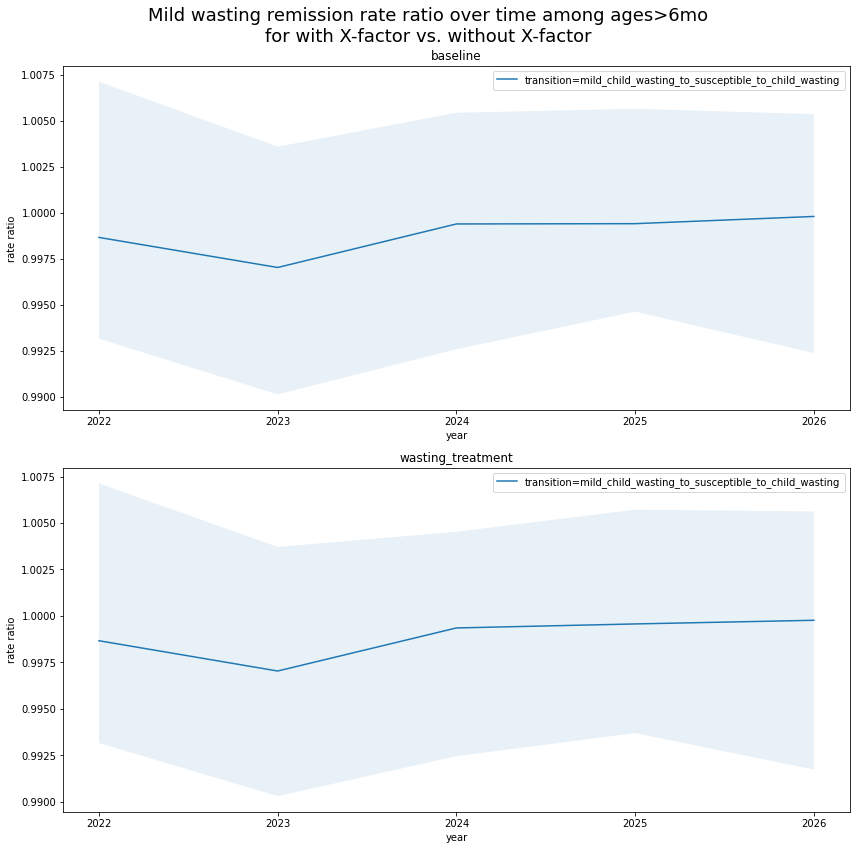

In [25]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='mild_child_wasting_to_susceptible_to_child_wasting'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Mild wasting remission rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

# The sucessful SAM treatment rate ratio should also be 1

Looks good.

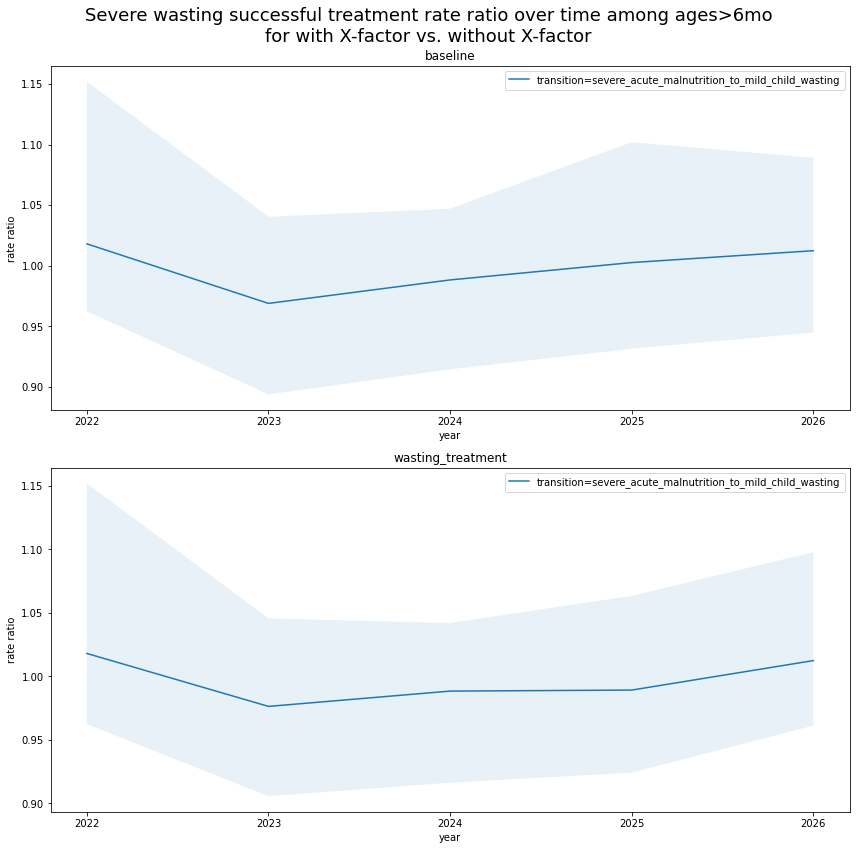

In [26]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='severe_acute_malnutrition_to_mild_child_wasting'"),
    colname='transition',
    ylabel="rate ratio",
    suptitle="Severe wasting successful treatment rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)